<a href="https://colab.research.google.com/github/daonly/personal/blob/main/Conf_physio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install neurokit2
pip install bioread

In [5]:
### preparation
import neurokit2 as nk
import bioread as br
import os
import pandas as pd

### set path
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Res/Conformity/data')
datapath = r'/content/drive/MyDrive/Res/Conformity/data'
savepath = r'/content/drive/MyDrive/Res/Conformity/analyses'

Mounted at /content/drive


In [39]:
### import and set raw data

tasklist = ['HRV', 'HCT', 'BlockI', 'BlockII']

for i in range(2,3):

  txtpath = datapath+f'/sub{i}.txt'
  data = pd.read_csv(txtpath, delimiter='\t', low_memory=False)
  data = data.iloc[1:]; data = data.iloc[:, :-1]

  signal = []
  for j in range(1, len(data)):
    if data['CH25'][j] == '0' and data['CH25'][j+1] == '5':
      signal.append(j+1)

  for j in range(4):
    slicedf = data.iloc[signal[2*j]:signal[2*j+1]]
    savefile = datapath+f'/sub{i}_{tasklist[j]}.csv'
    slicedf.to_csv(savefile, index=True)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-6e7c0ac7e13a>", line 30, in <cell line: 26>
    hrvdf1.loc[0, 1] = SubID
NameError: name 'hrvdf1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/co

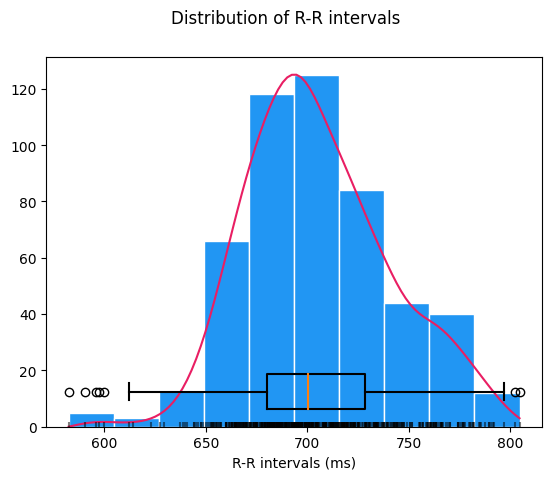

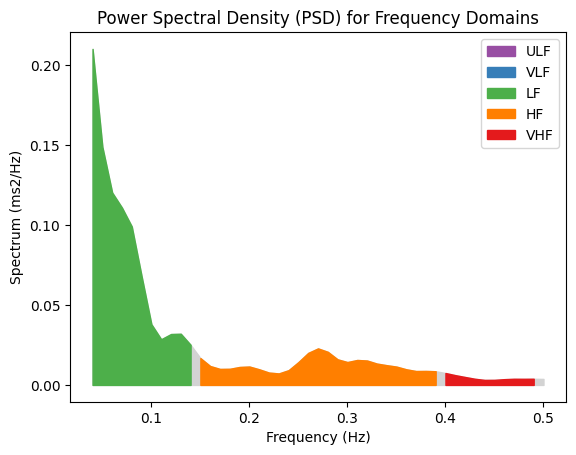

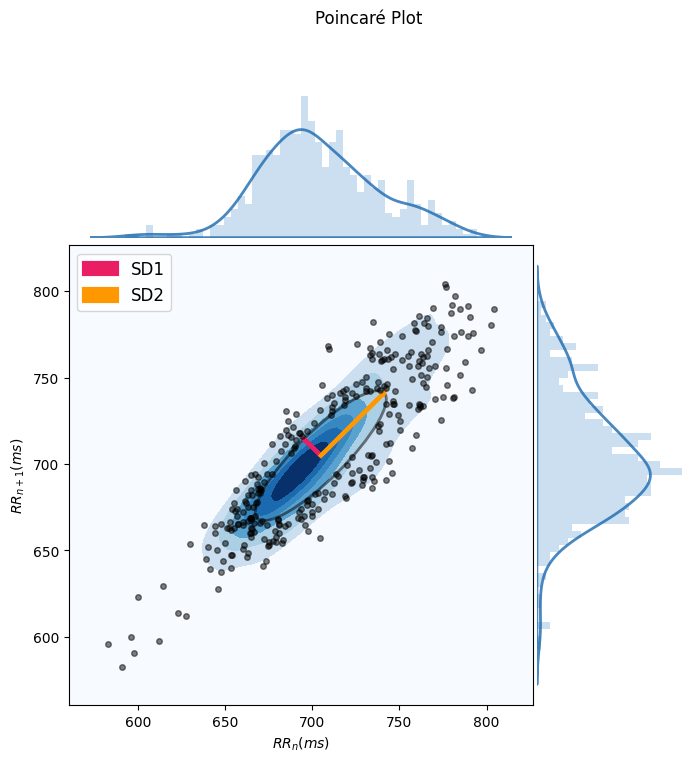

In [ ]:
### HRV

hrvdf = pd.DataFrame()

for i in range(1,2):

  ### SubID
  SubID = str(i)
  hrvdf.loc[0, 1] = SubID

  ### Compute time-domain indices of HRV
  hrvfile = datapath+f'/sub{SubID}_HRV.csv'
  data = pd.read_csv(hrvfile)
  peaks, info = nk.ecg_peaks(data['CH1'], sampling_rate=2000)
  hrvtime = nk.hrv_time(peaks, sampling_rate=2000, show=False)
  hrvdf = pd.concat([hrvdf, hrvtime], axis=1, ignore_index=False)

  ### Compute frequency-domain indices of HRV
  hrvfreq = nk.hrv_frequency(peaks, sampling_rate=2000, show=False)
  hrvdf = pd.concat([hrvdf, hrvfreq], axis=1, ignore_index=False)

  ### Compute nonlinear indices of HRV
  hrvnonlin = nk.hrv_nonlinear(peaks, sampling_rate=2000, show=False
  hrvdf = pd.concat([hrvdf, hrvnonlin], axis=1, ignore_index=False)

for i in range(2,3):

  ### SubID
  SubID = str(i)
  hrvdf1.loc[0, 1] = SubID

  ### Compute time-domain indices of HRV
  hrvfile = datapath+f'/sub{SubID}_HRV.csv'
  data = pd.read_csv(hrvfile)
  peaks, info = nk.ecg_peaks(data['CH1'], sampling_rate=2000)
  hrvtime = nk.hrv_time(peaks, sampling_rate=2000, show=True)
  hrvdf1 = pd.concat([hrvdf1, hrvtime], axis=1, ignore_index=False)

  ### Compute frequency-domain indices of HRV
  hrvfreq = nk.hrv_frequency(peaks, sampling_rate=2000, show=True)
  hrvdf1 = pd.concat([hrvdf1, hrvfreq], axis=1, ignore_index=False)

  ### Compute nonlinear indices of HRV
  hrvnonlin = nk.hrv_nonlinear(peaks, sampling_rate=2000, show=True)
  hrvdf1 = pd.concat([hrvdf1, hrvnonlin], axis=1, ignore_index=False)
  hrvdf = pd.concat([hrvdf, hrvdf1], ignore_index=True)

hrvdf

In [22]:
pd.concat?

In [15]:
signal

[308444, 1028996, 1625659, 2494407, 2920984, 4978783, 5444161, 6756107]